# TASK 4.9 PART 2

**This script answers the following questions:**
    
**1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).**

**2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.**

**3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.**

**4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.**

**5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)**

**6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.**

**7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.**

**8. Export your visualizations as “.png” files in your relevant project folder.**

In [1]:
#import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

**1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).**

In [2]:
#create path

path = r'C:\Users\ddgal\OneDrive\Desktop\Career Foundry Tasks\Data Immersion\22-03-2023 Instacart Basket Analysis'

In [3]:
#import merged data set from part 1, since we are only working with one data set in this exercise, I will simply call it df

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_prods_merge.pkl'))

**2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.**

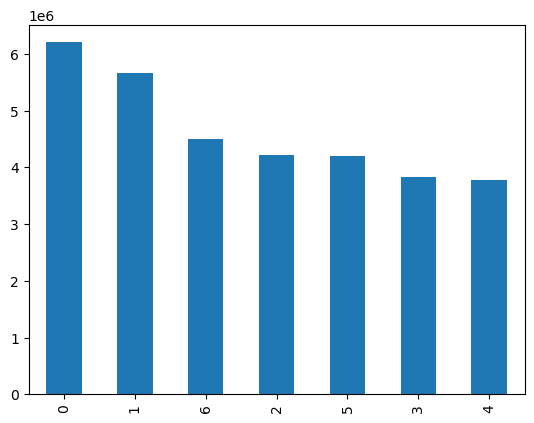

In [4]:
#create a bar chart

bar_orders_day_of_week = df['orders_day_of_week'].value_counts().plot.bar()

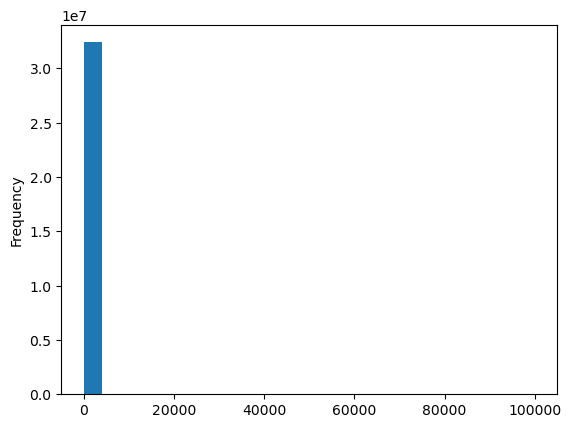

In [5]:
#histogram

hist = df['prices'].plot.hist(bins = 25)

In [6]:
#get statistical data as histogram does not make any sense

df['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

So, the max value does not make any sense.  Lets see if we can isolate the price values over 100.  We are using 100 as a max prices people would be willing to pay for a grocery item.  

In [7]:
#display all columns

pd.set_option('display.max_columns', None)

In [8]:
#display df with only prices over 100

df.loc[df['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,customer_status,loyalty_flag,avg_user_price,spender_status,med_days_prior_order,frequency_status,gender,state,age,date_joined,num_of_children,fam_status,income
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regular Days,Most orders,47,Existing customer,Loyal customer,50.932895,High spender,6.0,Frequent customer,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Slowest days,Most orders,47,Existing customer,Loyal customer,50.932895,High spender,6.0,Frequent customer,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Busiest days,Average orders,48,Existing customer,Loyal customer,35.233761,High spender,5.0,Frequent customer,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Regular Days,Average orders,29,Existing customer,Regular customer,267.469870,High spender,8.0,Frequent customer,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regular Days,Most orders,18,Existing customer,Regular customer,71.191102,High spender,14.0,Regular customer,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Busiest days,Average orders,5,New customer,New customer,6390.138298,High spender,13.0,Regular customer,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Least busy,Slowest days,Most orders,13,Existing customer,Regular customer,3453.431034,High spender,13.0,Regular customer,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Regular Days,Most orders,7,New customer,New customer,1223.879268,High spender,23.0,Non-frequent customer,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Least busy,Slowest days,Average orders,4,New customer,New customer,11772.100000,High spender,6.0,Frequent customer,Female,South Carolina,48,1/18/2017,2,married,398880


The prices over 100 are obviously outliers, so lets replace them with Nan values.

In [9]:
#replace price values over 100 with Nan

df.loc[df['prices'] >100, 'prices'] = np.nan

In [10]:
#check

df['prices'].max()

25.0

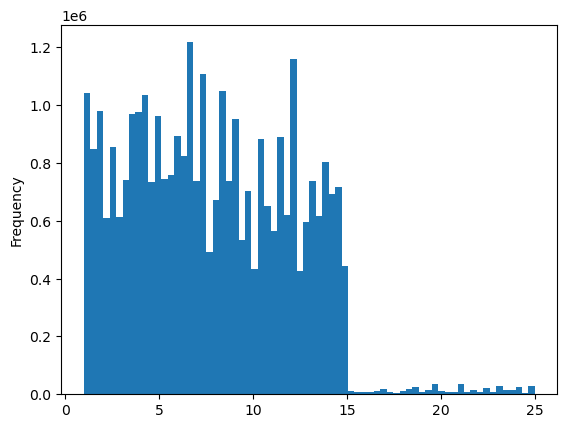

In [11]:
#try histogram again with revised max

hist_prices = df['prices'].plot.hist(bins = 70)

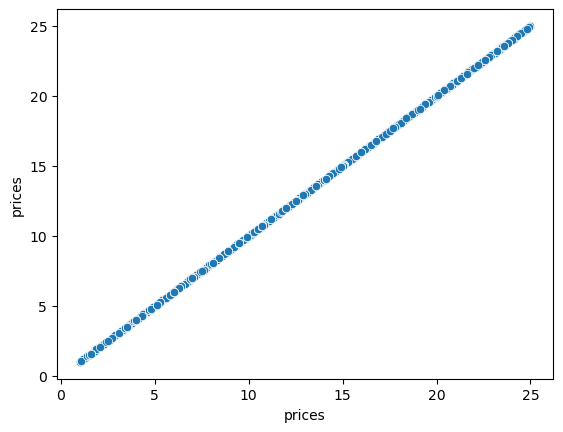

In [12]:
#create scatter plot

scatter_prices = sns.scatterplot(x = 'prices', y = 'prices', data = df)

In [13]:
#creates list of random True/False to test random.rand and sets seed

np.random.seed(4) #set seed
dev = np.random.rand(len(df)) <= 0.7 

In [14]:
#sets size of big(70%) and small(30%) from df subset

big = df[dev]
small = df[~dev]

In [15]:
#checks length of df

len(df)

32404859

In [16]:
#checks if length of big and small add up to total

len(big) + len(small)

32404859

They match, so lets go ahead and create the line chart

In [17]:
#create df_days_prices with small data set and columns orders_day_of_week and prices

df_days_prices = small[['orders_day_of_week','prices']]

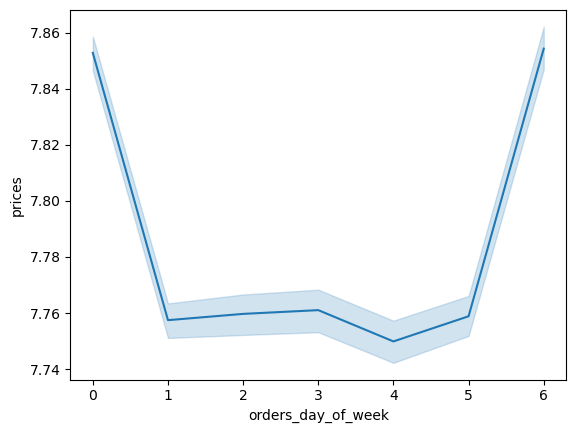

In [18]:
#create line chart with df_days_prices

line_days_prices = sns.lineplot(data = df_days_prices, x = 'orders_day_of_week',y = 'prices')

**3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.**

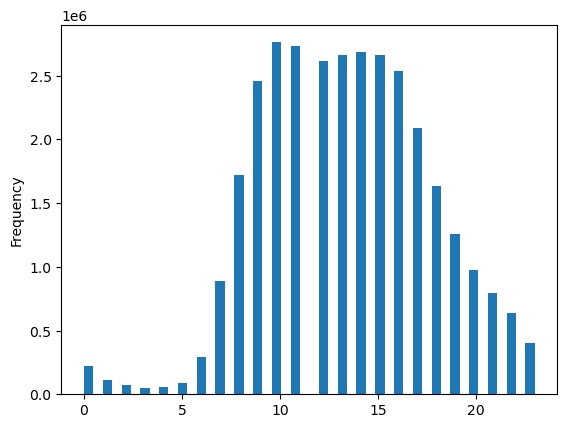

In [19]:
#create histogram of order_hour_of_day

hist_hour= df['order_hour_of_day'].plot.hist(bins = 48)

The histogram clearly shows that the busiest hours of the day for the entire data set is between 8 and 18 or 8am and 6pm.  

**4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.**

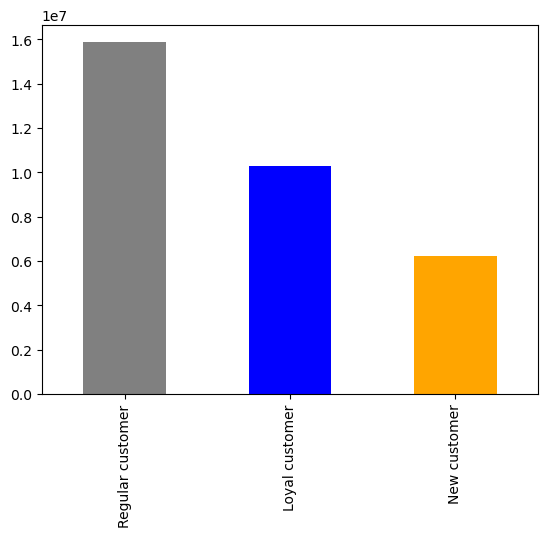

In [20]:
#create bar chart from loyalty flag column

bar_loyalty = df['loyalty_flag'].value_counts().plot.bar(color = ['grey', 'blue', 'orange'])

Instacart's clientele are mostly regular customers, followed by loyal and new, respectively. 

**5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)**

In [21]:
#create df_hour_prices from small subset with columns prices and orders_hour_of_day

df_hour_prices = small[['order_hour_of_day','prices']]

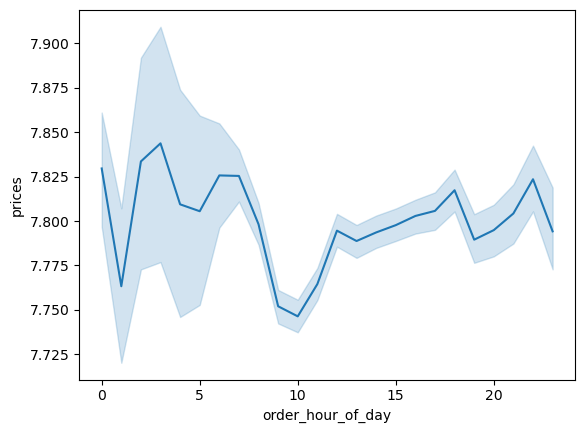

In [22]:
#create line chart from prices and order_hour_of_day

line_hour_prices = sns.lineplot(data = df_hour_prices, x = 'order_hour_of_day',y = 'prices')

There is not much price fluctuation depending on the hour of the day.  The lowest price is 7.75 at 10am and the highest price is 7.84 at 3am.  This is only a difference of 0.09 which is negligible.

**6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents: In a markdown cell beneath your line chart, describe what the line chart shows.**

In [23]:
#create df_age_children from small subset containing columns age and num_of_children

df_age_child = small[['age','num_of_children']]

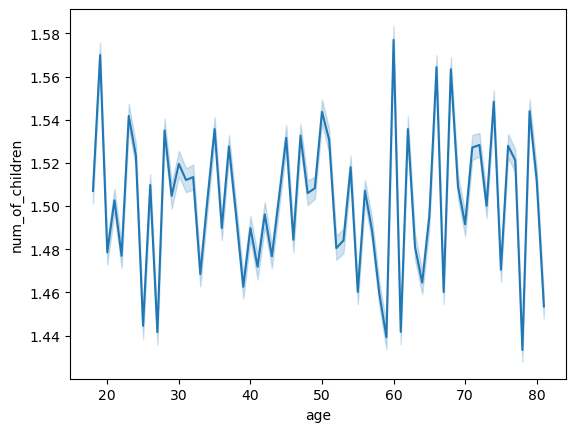

In [24]:
#create line chart from df_age_child

line_age_child= sns.lineplot(data = df_age_child, x = 'age', y = 'num_of_children')

There is no relationship between age and number of children.  The only thing this tells us is almost everybody who has children has on average between 1 and 1.6 children. This, however makes no sense as you cannot have a fraction of a child.  

**7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.**

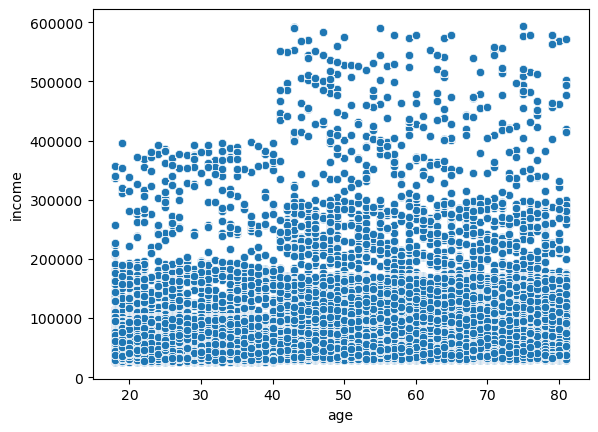

In [25]:
#create scatter plot scatter_age_income

scatter_age_income = sns.scatterplot(x = 'age', y = 'income', data = df)

This scatter plot shows us the highest earners of over 400,000 income all occur in people over 40.  It also tell us, that most people earn under 200,000 income. However, there is no clear pattern between age and income, if there were the plots would follow a line upwards as age increased; if income was directly related to age.

**8. Export your visualizations as “.png” files in your relevant project folder.**

In [28]:
#export visulizations as png to analysis folder

bar_orders_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_day_of_week.png'))
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))
scatter_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_prices.png'))
line_days_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_days_prices.png'))
hist_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hour.png'))
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))
line_hour_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_prices.png'))
line_age_child.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_child.png'))
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))